# 라이브러리 로드

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from glob import glob
from PIL import Image

import warnings
warnings.filterwarnings(action='ignore')
import random
import os
import tqdm as tqdm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pillow_heif
import cv2

import splitfolders

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report

import glob
import warnings
warnings.filterwarnings("ignore")

# 데이터 로딩 및 HEIC -> png

In [9]:
import os
import cv2

In [10]:
import pillow_heif


for filename in test_img_path: # test_img_path는 이미지 저장한 경로
    if filename.lower().endswith(".heic"): # 파일 경로를 모두 소문자로 바꾸고, .heic로 끝나는 경우(.heic 확장자인 경우)
        heif_file = pillow_heif.read_heif(filename) # pillow_heif 라이브러리를 이용해 불러오고
        img = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data,
            "raw"
        )
        new_name = f"{filename.split('.')[0]}.png" # 경로를 그대로 유지하기 위해 만든 변수
        print(new_name)
        img.save(new_name, format="png") # png 확장자로 변환해 저장
    else: # .heic 확장자가 아닌경우 (.jpg, .jpeg 등), 아무런 처리도 안하지만 진행 상황을 보기 위해 경로 그대로 출력
        print(filename)

In [11]:
root_dir = "test"
image_label = os.listdir(root_dir)
image_label

['1', '10-1', '10-2', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
root_dir_2 = "train"
image_label_2 = os.listdir(root_dir)
image_label_2

['1', '10-1', '10-2', '2', '3', '4', '5', '6', '7', '8', '9']

In [13]:
import glob
test = glob.glob(f"{root_dir}/{image_label[:11]}/*.png")
train = glob.glob(f"{root_dir_2}/{image_label_2[:11]}/*.png")
len(test), test[0], len(train), train[0]

(264, 'test\\1\\IMG_4373.png', 38, 'train\\1\\IMG_4632.png')

# HEIC 제거

In [ ]:
# .heic 제거

train_df = pd.DataFrame()
train_df["path"] = train_img.map(lambda x: x)
train_df["ClassId"] = train_img.map(lambda x: x.split("\\")[1])
train_df["FileName"] = train_img.map(lambda x: x.split("\\")[2])

test_df = pd.DataFrame()
test_df["path"] = test_img.map(lambda x: x)
test_df["ClassId"] = test_img.map(lambda x: x.split("\\")[1])
test_df["FileName"] = test_img.map(lambda x: x.split("\\")[2])

## test 데이터 확장자 변경 HEIC ->png

In [ ]:
for filename in test:
    if filename.lower().endswith(".heic"):
        heif_file = pillow_heif.read_heif(filename)
        img = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data,
            "raw"
        )
        new_name = f"{filename.split('.')[0]}.png"
        print(new_name)
        img.save(new_name, format="png")
    else:
        print(filename)

## train 데이터 확장자 변경 HEIC ->png

In [ ]:
for filename in train:
    if filename.lower().endswith(".heic"):
        heif_file = pillow_heif.read_heif(filename)
        img = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data,
            "raw"
        )
        new_name = f"{filename.split('.')[0]}.png"
        print(new_name)
        img.save(new_name, format="png")
    else:
        print(filename)

# 이미지 미리보기

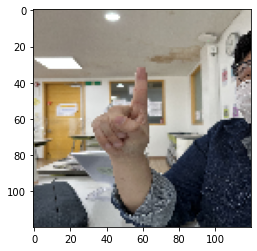

In [14]:
img = cv2.imread(test[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (120, 120))
plt.imshow(img)

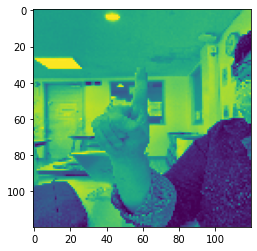

In [15]:
# R
plt.imshow(img[:, :, 0])

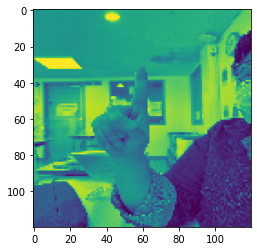

In [16]:
# G
plt.imshow(img[:, :, 1])

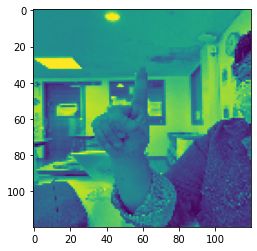

In [17]:
# B
plt.imshow(img[:, :, 2])

1 30 test/1\IMG_4373.png
10-1 34 test/10-1\KakaoTalk_20211103_213451117.jpg
10-2 30 test/10-2\IMG_4382.png
2 30 test/2\IMG_4374.png
3 24 test/3\IMG_4375.png
4 30 test/4\IMG_4376.png
5 30 test/5\IMG_4377.png
6 30 test/6\IMG_4378.png
7 30 test/7\IMG_4379.png
8 30 test/8\IMG_4380.png
9 30 test/9\IMG_4381.png


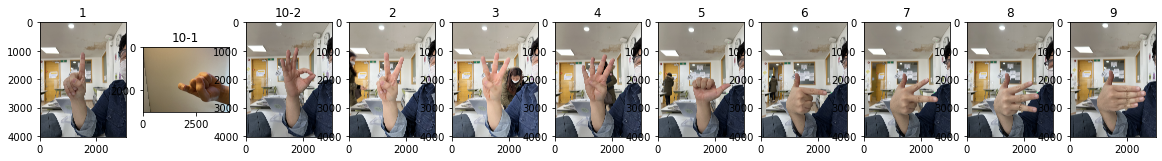

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=len(image_label), figsize=(20, 5))

for i, img_label in enumerate(image_label):
    wfiles = glob.glob(f"{root_dir}/{img_label}/*")
    print(img_label, len(wfiles), wfiles[0])
    axes[i].imshow(plt.imread(wfiles[0]))
    axes[i].set_title(img_label)

# 이미지 데이터셋 만들기

In [19]:
def img_read_resize(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (120, 120))
    return img

In [20]:
img_path = "test/2/IMG_4419.png"
#plt.imread(img_path)
img_read_resize(img_path).shape

(120, 120, 3)

In [21]:
# 전체 이미지 파일을 읽어서 list 에 담아주는 함수
# 특정 날씨 폴더의 전체 이미지를 읽어옵니다.
# 반복문을 통해서 이미지를 하나씩 순회하며 img_read 배열 형태로 변경된 이미지를 읽어옵니다.
# img_files 에 읽어온 이미지를 append로 하나씩 추가합니다.
# 반복문 순회가 끝나면 img_files 리스트를 반환합니다.

def img_folder_read(img_label):
    img_files = []
    labels = []
    wfiles = glob.glob(f"{root_dir}/{img_label}/*")
    wfiles = sorted(wfiles)
                       
    for w_img in wfiles:
        try:
            img_files.append(img_read_resize(w_img))
            labels.append(img_label)
        except:
            continue
                       
    return img_files, labels
                       
img_sample, labels = img_folder_read("3")
len(img_sample), len(labels)

(24, 24)

In [22]:
x_train_img = []
x_test_img = []
y_train_img = []
y_test_img = []

for img_label in tqdm.tqdm(image_label):
    # 위에서 만든 img_folder_read 를 통해 
    # 이미지와 정답값을 가져와서 train, test 리스트에 담아줍니다. 
    x_temp, y_temp = img_folder_read(img_label)
    
    if img_label == "sign_test":
        x_test_img.extend(x_temp)
        y_test_img.extend(y_temp)
    else:
        x_train_img.extend(x_temp)
        y_train_img.extend(y_temp)
        
        
len(x_train_img), len(y_train_img), len(x_test_img), len(y_test_img)

100%|██████████| 11/11 [00:42<00:00,  3.89s/it]


(328, 328, 0, 0)

# Model: Efficient Net

In [23]:
from tensorflow.keras.applications import EfficientNetB0

model = EfficientNetB0(
    input_shape=(300, 300, 3),
    include_top=False,
    weights="imagenet"
)

# Fine Tuning

In [24]:
#모델의 매개변수를 매우 정확하게 조정해야 하는 프로세스

model.trainable = True

for layer in model.layers[:-15]:
    layer.trainable = False
    
x = tf.keras.layers.Flatten()(model.output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(11, activation="softmax")(x)

model = tf.keras.Model(model.input, x)

model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

# 이미지 데이터 제너레이터

In [25]:
import splitfolders

In [26]:
splitfolders.ratio(input="./train/", output="./kor_number", ratio=(0.9, 0.05, 0.05))


Copying files: 815 files [00:02, 350.56 files/s]


In [30]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory("./kor_number/train/", target_size=(300, 300), batch_size=32, shuffle=True, class_mode='sparse')
test_generator = test_datagen.flow_from_directory("./kor_number/test/", target_size=(300,300), batch_size=32, shuffle=False, class_mode='sparse')
val_generator = val_datagen.flow_from_directory("./kor_number/val/", target_size=(300,300), batch_size=32, shuffle=False, class_mode='sparse')

Found 681 images belonging to 11 classes.
Found 53 images belonging to 11 classes.
Found 34 images belonging to 11 classes.


# Train

In [31]:
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=0, patience=10)
model_check = ModelCheckpoint("model_kor_num_no_augmentation.h5", monitor="val_accuracy", mode="max", save_best_only=True)

In [32]:

with tf.device("/device:GPU:0"):
        history = model.fit(train_generator, validation_data=val_generator, epochs=50, verbose=1, callbacks=[early_stopping, model_check])

Epoch 1/50
22/22 [==============================] - 85s 4s/step - loss: 4.5015 - accuracy: 0.4728 - val_loss: 4.9472 - val_accuracy: 0.6471
Epoch 2/50
22/22 [==============================] - 79s 4s/step - loss: 1.2829 - accuracy: 0.8062 - val_loss: 3.4211 - val_accuracy: 0.6176
Epoch 3/50
22/22 [==============================] - 78s 4s/step - loss: 0.7132 - accuracy: 0.8840 - val_loss: 3.1272 - val_accuracy: 0.7647
Epoch 4/50
22/22 [==============================] - 74s 3s/step - loss: 0.3070 - accuracy: 0.9545 - val_loss: 3.4053 - val_accuracy: 0.7647
Epoch 5/50
22/22 [==============================] - 75s 3s/step - loss: 0.1913 - accuracy: 0.9604 - val_loss: 3.7021 - val_accuracy: 0.7353
Epoch 6/50
22/22 [==============================] - 76s 3s/step - loss: 0.1531 - accuracy: 0.9750 - val_loss: 3.3357 - val_accuracy: 0.7353
Epoch 7/50
22/22 [==============================] - 81s 4s/step - loss: 0.3494 - accuracy: 0.9515 - val_loss: 4.5972 - val_accuracy: 0.7059
Epoch 8/50
22/22 [==

# Model Evaluation

In [33]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

2/2 [==============================] - 6s 2s/step - loss: 2.1352 - accuracy: 0.8491
Loss: 213.523
Accuracy: 84.906


In [34]:
y_val = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

print(classification_report(y_val, y_pred))

2/2 [==============================] - 8s 3s/step
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.67      1.00      0.80         4
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         5
           4       1.00      0.40      0.57         5
           5       0.67      0.80      0.73         5
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         5
           8       1.00      0.80      0.89         5
           9       1.00      1.00      1.00         5
          10       1.00      0.75      0.86         4

    accuracy                           0.85        53
   macro avg       0.89      0.85      0.84        53
weighted avg       0.89      0.85      0.84        53

